In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import ngrams

%matplotlib inline

In [3]:
# Initialize WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [4]:
# Download NLTK data
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rohit94\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit94\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Define the stopwords
all_stopwords = set(stopwords.words('english'))

In [6]:
all_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
def clean_text(text, stopwords):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [wordnet.lemmatize(word) for word in text]  # Lemmatize words
    text = [word for word in text if word not in stopwords]  # Remove stopwords
    text = ' '.join(text)  # Rejoin words into a single string
    return text

def combine_data(list1, list2):
    combined_data = []
    for i in range(len(list1)):
        new_str = list1[i] + ' ' + list2[i]
        combined_data.append(new_str)
    return combined_data

def generate_frequency(text_list):
    fdist = FreqDist()
    for i in text_list:
        words = i.split()
        words = [word for word in words if word != '']
        words = ngrams(words, 1)
        for x in words:
            fdist[x[0]] += 1
    return fdist

# RedditterrorismData

In [8]:
# Load the data
df = pd.read_csv(r'C:\Users\Rohit94\Documents\project_2023\Terroristactivitydetectionchatbot-main\Dataset/RedditTerrorismData.csv')

In [9]:
df

,id,subreddit,title,text
0,knzoe8,Bombing,Rest easy MF DOOM,NaN
1,cxkhpc,Bombing,Nice vowels my guy,NaN
2,e8e4pq,Bombing,Aneko,NaN
3,e60xj0,Bombing,"GETNUP, Melbourne Australia.",NaN
4,nilakf,Bombing,RAZOR,NaN
...,...,...,...,...
995,gmn5hw,terrorism,Trial of 'RAW Agent' in German Court Casts Spo...,NaN
996,geftnv,terrorism,Quick question: why is isis and aq fighting ea...,"since the tongo tongo ambush, or maybe before ..."
997,gbi6ms,terrorism,Albania Detains Tajik Terror Suspect Wanted In...,NaN
998,gac9ma,terrorism,Mozambique forces killed over 100 Islamist ins...,NaN


In [10]:
# Display the first few rows of the dataframe
print(df.head())

# Display information about the dataframe
print(df.info())

       id subreddit                         title text
0  knzoe8   Bombing             Rest easy MF DOOM  NaN
1  cxkhpc   Bombing            Nice vowels my guy  NaN
2  e8e4pq   Bombing                         Aneko  NaN
3  e60xj0   Bombing  GETNUP, Melbourne Australia.  NaN
4  nilakf   Bombing                         RAZOR  NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   object
 1   subreddit  1000 non-null   object
 2   title      1000 non-null   object
 3   text       21 non-null     object
dtypes: object(4)
memory usage: 31.4+ KB
None


In [11]:
# Add custom stopwords
new_words = ["http", "www", "co", "u", "com", "t", "s", "m", "ve", "dy", "ll", 'n', 'r', 'b', "wa", "y", "don", "ha"]
for words in new_words:
    all_stopwords.add(words)

In [12]:
# Fill NaN values in 'text' column with empty string
df['text'].fillna(value=' ', inplace=True)

# Clean 'title' and 'text' columns
df['title'] = df['title'].apply(lambda x: clean_text(x, stopwords=all_stopwords))
df['text'] = df['text'].apply(lambda x: clean_text(x, stopwords=all_stopwords))

# Combine 'title' and 'text' into a new column 'cleaned'
df['cleaned'] = combine_data(df['title'], df['text'])

In [13]:
df

,id,subreddit,title,text,cleaned
0,knzoe8,Bombing,rest easy mf doom,,rest easy mf doom
1,cxkhpc,Bombing,nice vowel guy,,nice vowel guy
2,e8e4pq,Bombing,aneko,,aneko
3,e60xj0,Bombing,getnup melbourne australia,,getnup melbourne australia
4,nilakf,Bombing,razor,,razor
...,...,...,...,...,...
995,gmn5hw,terrorism,trial raw agent german court cast spotlight in...,,trial raw agent german court cast spotlight in...
996,geftnv,terrorism,quick question isi aq fighting asia get along ...,since tongo tongo ambush maybe aq affiliated g...,quick question isi aq fighting asia get along ...
997,gbi6ms,terrorism,albania detains tajik terror suspect wanted ge...,,albania detains tajik terror suspect wanted ge...
998,gac9ma,terrorism,mozambique force killed islamist insurgent pas...,,mozambique force killed islamist insurgent pas...


In [14]:
# Generate frequency distribution
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

# Create a dictionary of the top words and their frequencies
word_dict = {word: count for word, count in top_words}

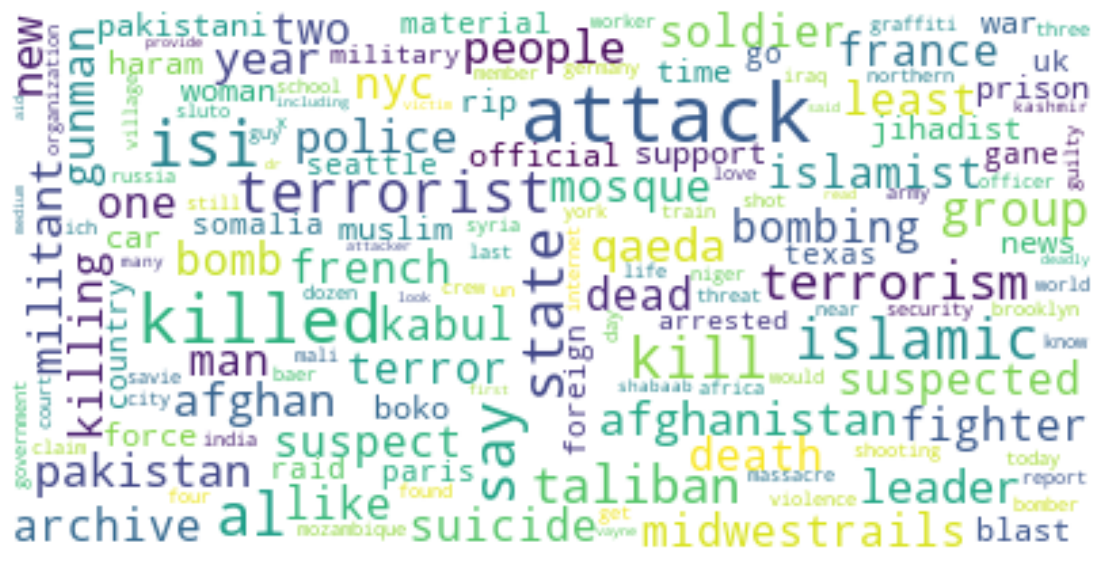

In [15]:
# Generate a word cloud
wordcloud = WordCloud(background_color="white", max_font_size=30).generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
df = pd.read_csv(r'C:\Users\Rohit94\Documents\project_2023\Terroristactivitydetectionchatbot-main\Dataset/TwitterTerroismData.csv')

In [17]:
df

,id,date,text
0,1361102701380173835,2021-02-14 23:59:06+00:00,Me: wants to spread love to people by like bom...
1,1361102395028213760,2021-02-14 23:57:53+00:00,"@giron Ahh, yes. In 1993 there was a truck bom..."
2,1361102335888396288,2021-02-14 23:57:39+00:00,@simon_robin @IndiaToday @nabilajamal_ @arvind...
3,1361102285611401217,2021-02-14 23:57:27+00:00,@UN Any idea why Israel military is bombing Da...
4,1361101666926362633,2021-02-14 23:55:00+00:00,@BBCNews Any idea why Israel military is bombi...
...,...,...,...
1995,1361097029389328397,2021-02-14 23:36:34+00:00,@JoeyNorman19 Been jealous is normal but too ...
1996,1361097029229957120,2021-02-14 23:36:34+00:00,@parentipilled @chachachabella @gablabbing no ...
1997,1361097028407726080,2021-02-14 23:36:34+00:00,"@USSGoodGirl Democrats killed 450,000 American..."
1998,1361097024049983490,2021-02-14 23:36:33+00:00,This programme go kill me


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   date    2000 non-null   object
 2   text    2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [19]:
df['cleaned'] = df['text'].apply(clean_text,stopwords = all_stopwords)

In [20]:
df

,id,date,text,cleaned
0,1361102701380173835,2021-02-14 23:59:06+00:00,Me: wants to spread love to people by like bom...,want spread love people like bombing tweet twi...
1,1361102395028213760,2021-02-14 23:57:53+00:00,"@giron Ahh, yes. In 1993 there was a truck bom...",giron ahh yes truck bombing make sense biggie sec
2,1361102335888396288,2021-02-14 23:57:39+00:00,@simon_robin @IndiaToday @nabilajamal_ @arvind...,simon robin indiatoday nabilajamal arvindojha ...
3,1361102285611401217,2021-02-14 23:57:27+00:00,@UN Any idea why Israel military is bombing Da...,un idea israel military bombing damascus right...
4,1361101666926362633,2021-02-14 23:55:00+00:00,@BBCNews Any idea why Israel military is bombi...,bbcnews idea israel military bombing damascus ...
...,...,...,...,...
1995,1361097029389328397,2021-02-14 23:36:34+00:00,@JoeyNorman19 Been jealous is normal but too ...,joeynorman jealous normal much kill
1996,1361097029229957120,2021-02-14 23:36:34+00:00,@parentipilled @chachachabella @gablabbing no ...,parentipilled chachachabella gablabbing like i...
1997,1361097028407726080,2021-02-14 23:36:34+00:00,"@USSGoodGirl Democrats killed 450,000 American...",ussgoodgirl democrat killed american make trum...
1998,1361097024049983490,2021-02-14 23:36:33+00:00,This programme go kill me,programme go kill


In [21]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [22]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

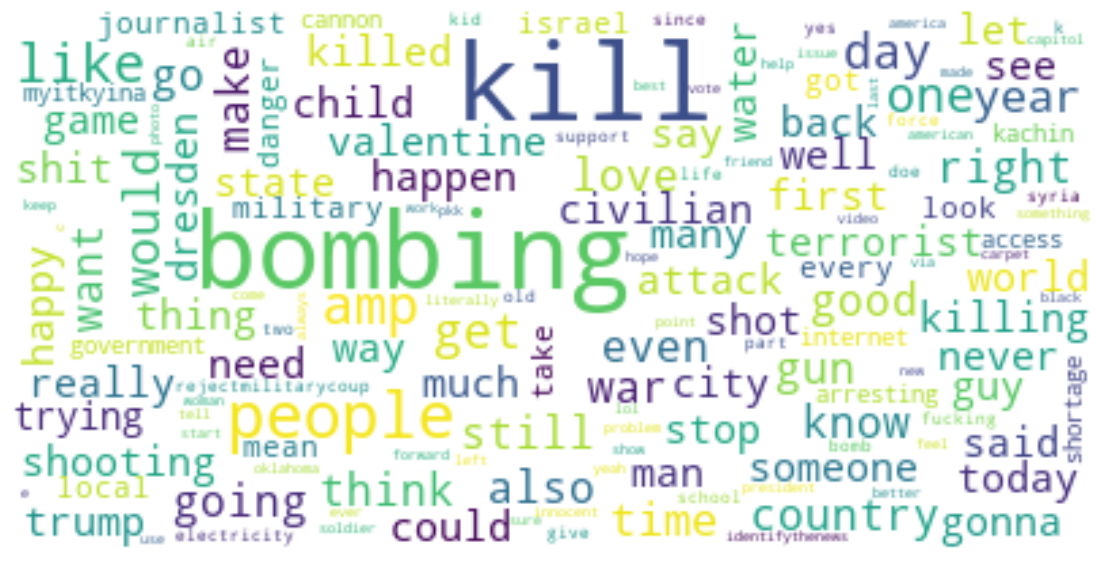

In [23]:
wordcloud = WordCloud(background_color="white",max_font_size=40).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
df = pd.read_csv(r'C:\Users\Rohit94\Documents\project_2023\Terroristactivitydetectionchatbot-main\Dataset/NoTerrorismData.csv')

In [25]:
df

,id,subreddit,title,text
0,62sjuh,movies,The Senate. Upvote this so that people see it ...,NaN
1,11ia0od,movies,"Hi, I’m Keanu Reeves, AMA",NaN
2,iikebv,movies,‘Black Panther’ actor Chadwick Boseman dies at...,NaN
3,tzxev3,movies,"Hello, I’m Nicolas Cage and welcome to Ask Me ...",NaN
4,ztqlgb,movies,"Hi, I’m Tobey Maguire, actor/executive produce...",NaN
...,...,...,...,...
1995,at85s3,Jokes,If I had a nickel for every time I didn’t know...,...I’d be like “why do I keep getting all thes...
1996,j01ord,Jokes,My girlfriend borrowed $100 from me. After 3ye...,I lost Interest in that relationship.
1997,7cre42,Jokes,"If I had a dollar for every downvote EA""s comm...",I would have enough money to unlock half of th...
1998,98ke4u,Jokes,"Astronaut 1: ""I can't find any milk for my cof...","Astronaut 2: ""In space no-one can. Here, use ..."


In [26]:
df.head()

,id,subreddit,title,text
0,62sjuh,movies,The Senate. Upvote this so that people see it ...,NaN
1,11ia0od,movies,"Hi, I’m Keanu Reeves, AMA",NaN
2,iikebv,movies,‘Black Panther’ actor Chadwick Boseman dies at...,NaN
3,tzxev3,movies,"Hello, I’m Nicolas Cage and welcome to Ask Me ...",NaN
4,ztqlgb,movies,"Hi, I’m Tobey Maguire, actor/executive produce...",NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2000 non-null   object
 1   subreddit  2000 non-null   object
 2   title      2000 non-null   object
 3   text       685 non-null    object
dtypes: object(4)
memory usage: 62.6+ KB


In [28]:
df['text'].fillna(value=' ',inplace=True)

In [29]:
df['title'] = df['title'].apply(clean_text,stopwords = all_stopwords)
df['text'] = df['text'].apply(clean_text,stopwords = all_stopwords)

In [30]:
df['cleaned'] = combine_data(df['title'],df['text'])

In [31]:
fdist = generate_frequency(df['cleaned'])
top_words = fdist.most_common(n=150)

In [32]:
word_dict = {}
for i in range(len(top_words)):
    word_dict[top_words[i][0]] = top_words[i][1]

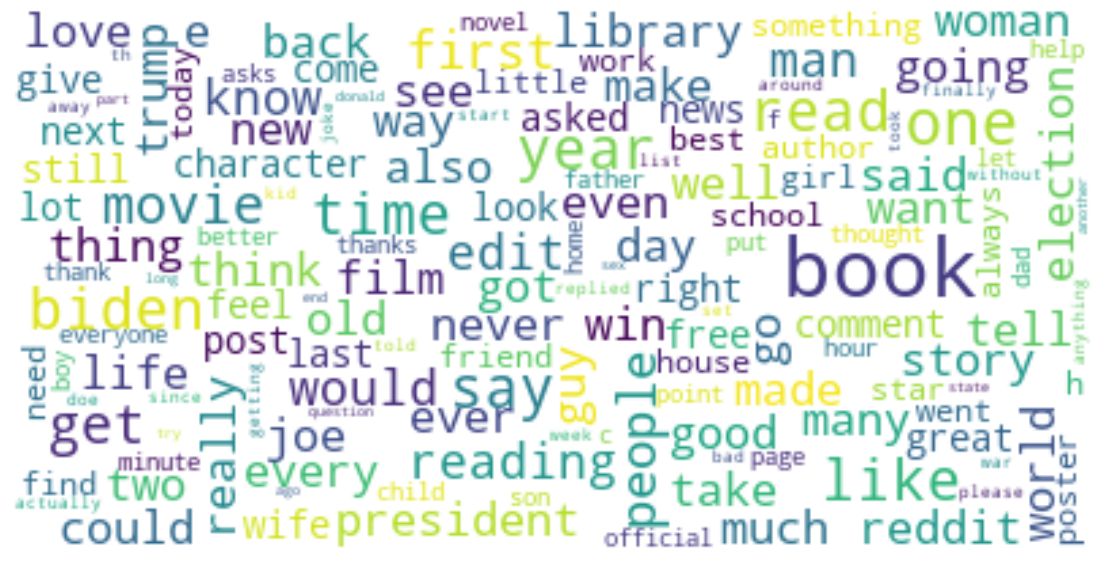

In [33]:
wordcloud = WordCloud(background_color="white",max_font_size=30).generate_from_frequencies(word_dict)

plt.figure(figsize = (14, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Merged Data

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing

In [37]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Rohit94\Documents\project_2023\Terroristactivitydetectionchatbot-main\Dataset/mergedData.csv')

In [38]:
df

,text,label
0,nigerian soldier battle boko haram kill r...,1
1,noah green capitol attacker supporter natio...,1
2,year ago tweet outed raid osama bin laden,1
3,terrorist attack austria,1
4,soldier receives medal honor helping save c...,1
...,...,...
5387,"2/1/1972: Irving Rubin, a member of the Jewish...",1
5388,03/06/1972: A bomb planted in a van in the cen...,1
5389,03/06/1972: Three masked gunmen planted a bomb...,1
5390,3/11/1972: The Jewish Armed Resistance Assault...,1


# Split Data

In [39]:
# Fill NaN values if any
df['text'].fillna('', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


# Vectorization Text pre Processing

In [41]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression

In [42]:
# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.963855421686747
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       269
           1       0.96      0.99      0.98       810

    accuracy                           0.96      1079
   macro avg       0.97      0.94      0.95      1079
weighted avg       0.96      0.96      0.96      1079



In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9564411492122336
Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91       269
           1       0.95      1.00      0.97       810

    accuracy                           0.96      1079
   macro avg       0.97      0.92      0.94      1079
weighted avg       0.96      0.96      0.96      1079



In [46]:
# Train a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
y_pred_dt = dt.predict(X_test_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9230769230769231
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       269
           1       0.92      0.98      0.95       810

    accuracy                           0.92      1079
   macro avg       0.92      0.87      0.89      1079
weighted avg       0.92      0.92      0.92      1079



# Deep Learning Algorithms

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [54]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Rohit94\Documents\project_2023\Terroristactivitydetectionchatbot-main\Dataset/mergedData.csv')

# Fill NaN values if any
df['text'].fillna('', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [55]:
# Fill NaN values if any
df['text'].fillna('', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [56]:
# Encode labels to categorical data
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Save the encoder
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [57]:
# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [58]:
# Build the ANN model
model = Sequential()
model.add(Dense(512, input_shape=(5000,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Assuming binary classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
108/108 [==============================] - 2s 16ms/step - loss: 0.3001 - accuracy: 0.8487 - val_loss: 0.1626 - val_accuracy: 0.9328
Epoch 2/10
108/108 [==============================] - 2s 20ms/step - loss: 0.0527 - accuracy: 0.9823 - val_loss: 0.1389 - val_accuracy: 0.9479
Epoch 3/10
108/108 [==============================] - 2s 23ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.1695 - val_accuracy: 0.9548
Epoch 4/10
108/108 [==============================] - 2s 21ms/step - loss: 0.0094 - accuracy: 0.9980 - val_loss: 0.1963 - val_accuracy: 0.9455
Epoch 5/10
108/108 [==============================] - 2s 21ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.1912 - val_accuracy: 0.9525
Epoch 6/10
108/108 [==============================] - 2s 19ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.2040 - val_accuracy: 0.9444
Epoch 7/10
108/108 [==============================] - 2s 20ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.2076 - val_accuracy: 0.9490

In [59]:
# Evaluate the model
y_pred_categorical = model.predict(X_test_tfidf)
y_pred = encoder.inverse_transform(y_pred_categorical.argmax(axis=1))

print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print("ANN Report:\n", classification_report(y_test, y_pred))

# Save the model
model.save('terrorism_model.h5')

34/34 [==============================] - 0s 3ms/step
ANN Accuracy: 0.9703429101019463
ANN Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       269
           1       0.97      1.00      0.98       810

    accuracy                           0.97      1079
   macro avg       0.98      0.94      0.96      1079
weighted avg       0.97      0.97      0.97      1079



In [61]:
import numpy as np
import joblib
from keras.models import load_model

# Load the saved model, vectorizer, and encoder
model = load_model('terrorism_model.h5')
vectorizer = joblib.load('tfidf_vectorizer.pkl')
encoder = joblib.load('label_encoder.pkl')

def predict(text):
    # Clean and preprocess the input text
    text_tfidf = vectorizer.transform([text]).toarray()
    
    # Predict the label
    y_pred_categorical = model.predict(text_tfidf)
    y_pred = encoder.inverse_transform(y_pred_categorical.argmax(axis=1))
    
    return y_pred[0]

# Example usage
input_text = "terrorist attack concentration intensity"
predicted_label = predict(input_text)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 58ms/step
Predicted Label: 1
